In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [39]:
df=pd.read_csv("C:\\Users\\SRIVANI\\Downloads\\archive (8)\\drug200.csv")
df1=df.copy()
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [41]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [42]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [43]:
numerical=["Age","Na_to_K"]
categorical=["Sex","BP","Cholesterol","Drug"]

In [44]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
ss=StandardScaler()
for col in categorical:
    df[col]=le.fit_transform(df[col])
    df[col]=df[col].astype('category')
for col in numerical:
    df[col]=ss.fit_transform(df[[col]]).flatten()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    float64 
 1   Sex          200 non-null    category
 2   BP           200 non-null    category
 3   Cholesterol  200 non-null    category
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    category
dtypes: category(4), float64(2)
memory usage: 4.5 KB


In [46]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.291591,0,0,0,1.286522,4
1,0.162699,1,1,0,-0.415145,2
2,0.162699,1,1,0,-0.828558,2
3,-0.988614,0,2,0,-1.149963,3
4,1.011034,0,1,0,0.271794,4
...,...,...,...,...,...,...
195,0.708057,0,1,0,-0.626917,2
196,-1.715759,1,1,0,-0.565995,2
197,0.465676,1,2,0,-0.859089,3
198,-1.291591,1,2,1,-0.286500,3


In [47]:
x=df.drop(columns=["Drug"],axis=1)
y=df["Drug"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)

(160, 5)
(160,)


In [48]:
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
y_pred=clf.predict(x_test)
y_pred

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0])

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

1.0

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



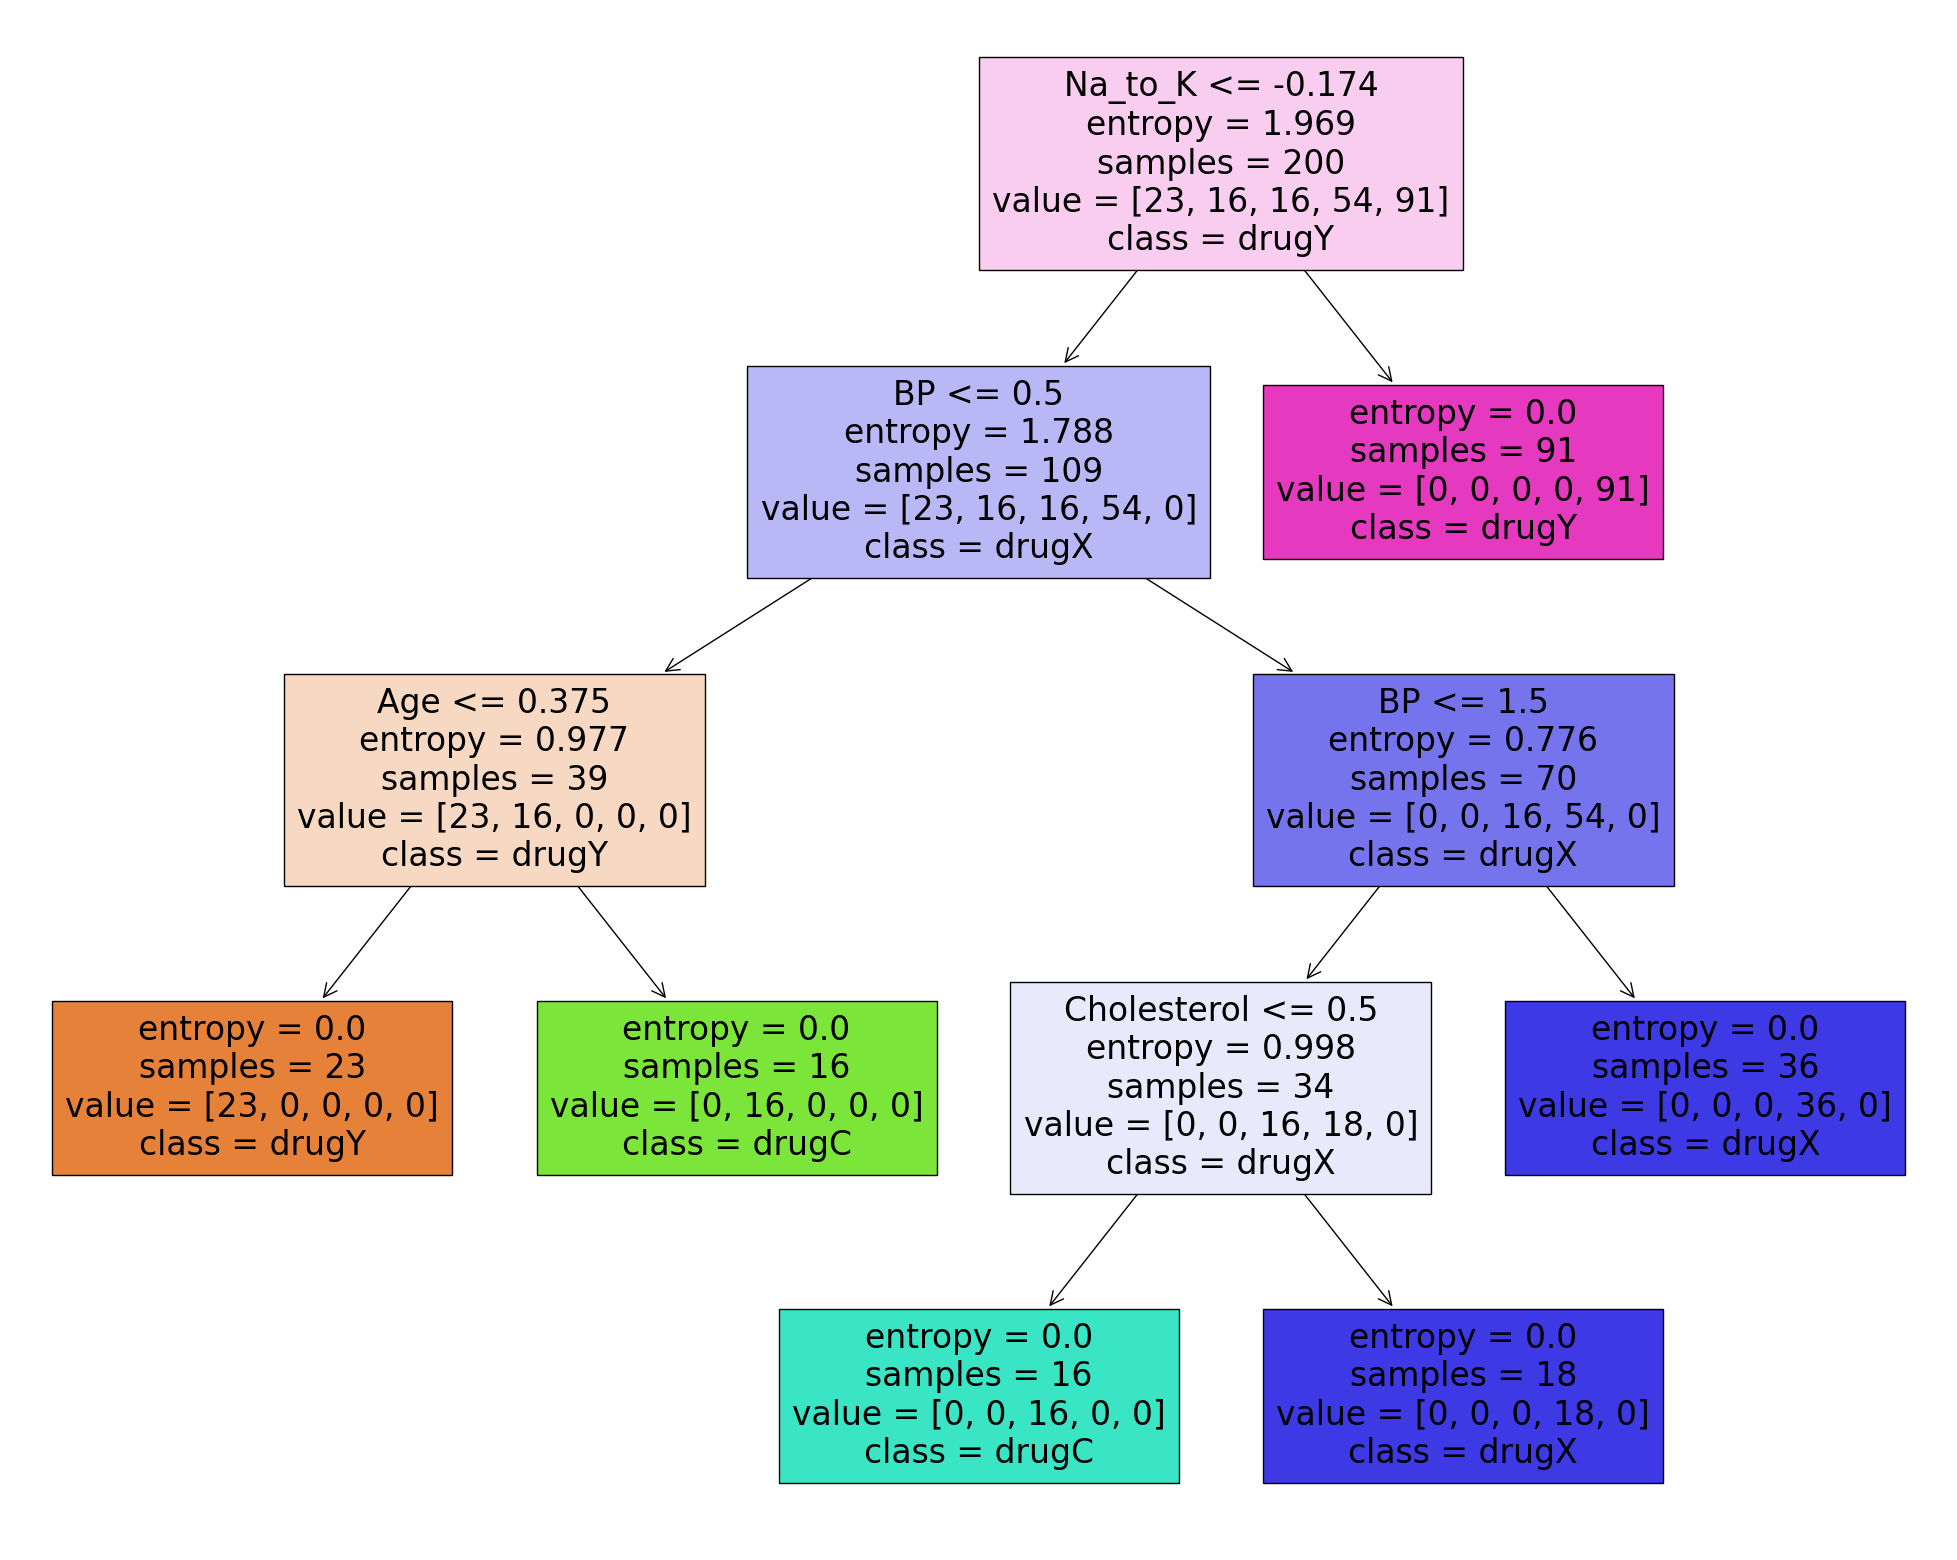

In [34]:
from sklearn import tree
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(clf,feature_names=df1.columns,class_names=df1['Drug'],filled=True)